In [1]:
import matplotlib.pyplot as plt

### Filters

Filters basically used for:
* Enhancing an image
* Emphasize or remove feature
* Smoothing
* Sharpening
* Edge detection

A common edge detection algorithm is sobal. Sobal requires a 2-dimensional grayscale image as input.

In [2]:
def plot_comparison(original, filtered, title_filtered):
    fig, (ax1, ax2) = plt.subplot(ncols=2, figsize=(8,6), sharex=True, sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title('title_filtered')
    ax2.axis('off')
    
    
def show_image(image, title='Image', cmap_type='gray'):
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
    plt.show()

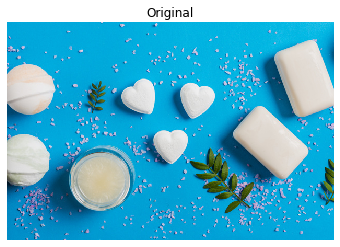

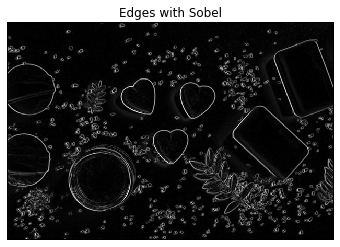

In [3]:
# Import the color, io module
from skimage import color
from skimage import io

# Load image
soaps_image = io.imread('soap_image.jpg')

# Make the image grayscale
soaps_image_gray = color.rgb2gray(soaps_image)

# Import the filters module and sobel function
from skimage.filters import sobel

# Apply edge detection filter
edge_sobel = sobel(soaps_image_gray)

# Show original and resulting image to compare
show_image(soaps_image, "Original")
show_image(edge_sobel, "Edges with Sobel")

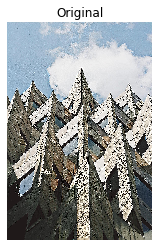

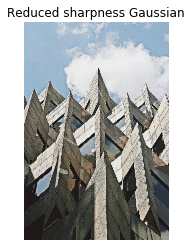

In [4]:
# Import Gaussian filter 
from skimage.filters import gaussian

building_image = io.imread('building_image.jpg')

# Apply filter
gaussian_image = gaussian(building_image, multichannel=True)

# Show original and resulting image to compare
show_image(building_image, "Original")
show_image(gaussian_image, "Reduced sharpness Gaussian")

### Contrast enhancement

Contrast is the difference between the maximum and minimum pixel intensity in the image.

An image of low contrast has small difference between its dark and light pixel value. Is usually skewed either right (being mostly light), to the left (mostly dark) or placed on middle (mostly gray).

We can ehnance the contrast through the Contrast Streching technique and Histogram Eqilization. 

There are three types of Histogram Eqilization:
1. Standard Histogram Eqilization
2. Adaptive Histogram Eqilization
3. Contrast Limited Adaptive Histogram Eqilization

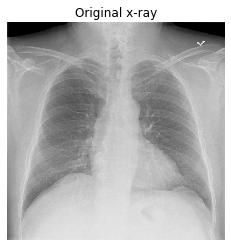

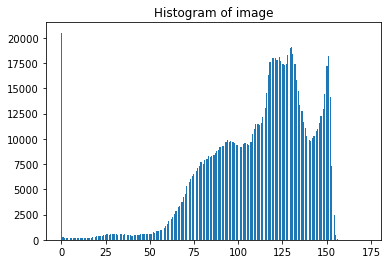

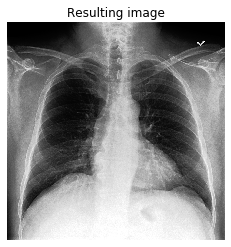

In [5]:
# Import the required module
from skimage import exposure

# load image
chest_xray_image = io.imread('chest_xray_image.png')

# Show original x-ray image and its histogram
show_image(chest_xray_image, 'Original x-ray')

plt.title('Histogram of image')
plt.hist(chest_xray_image.ravel(), bins=256)
plt.show()

# Use histogram equalization to improve the contrast
xray_image_eq =  exposure.equalize_hist(chest_xray_image)

# Show the resulting image
show_image(xray_image_eq, 'Resulting image')

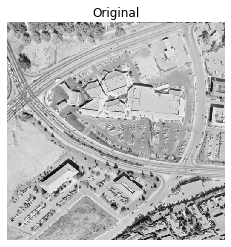

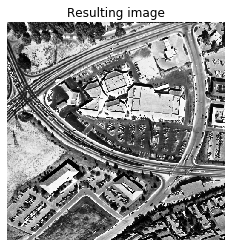

In [6]:
# Import the required module
from skimage import exposure

# load image
image_aerial = io.imread('image_aerial.tiff')

# Use histogram equalization to improve the contrast
image_eq =  exposure.equalize_hist(image_aerial)

# Show the original and resulting image
show_image(image_aerial, 'Original')
show_image(image_eq, 'Resulting image')

C:\Users\ab59349\AppData\Local\Continuum\anaconda3\envs\imageprocessing\lib\site-packages\skimage\util\dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


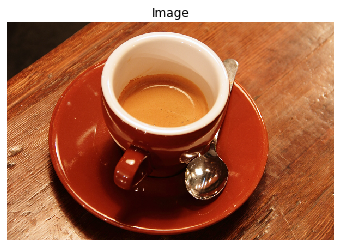

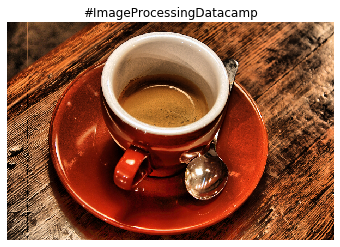

In [7]:
# Import the necessary modules
from skimage import data, exposure

# Load the image
original_image = data.coffee()

# Apply the adaptive equalization on the original image
adapthist_eq_image = exposure.equalize_adapthist(original_image, clip_limit=0.03)

# Compare the original image to the equalized
show_image(original_image)
show_image(adapthist_eq_image, '#ImageProcessingDatacamp')

### Transformations
The need of transformation:

* Preparing images for classification machine learning models
* optimization and compression of images
* save images with same proportion

#### Rotating and Rescaling

##### Aliasing in digital images

Aliasing makes an image look like it has a waves or ripples radiating from a certain portion.


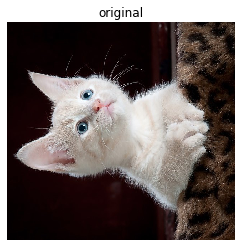

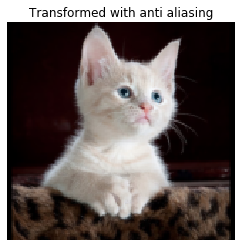

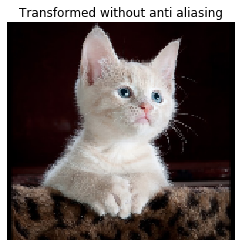

In [14]:
# Import the module and the rotate and rescale functions
from skimage.transform import rotate, rescale

image_cat = io.imread('image_cat.jpg')

# Rotate the image 90 degrees clockwise 
rotated_cat_image = rotate(image_cat, -90)

# Rescale with anti aliasing
rescaled_with_aa = rescale(rotated_cat_image, 1/4, anti_aliasing=True, multichannel=True)

# Rescale without anti aliasing
rescaled_without_aa = rescale(rotated_cat_image, 1/4, anti_aliasing=False, multichannel=True)

# Show the resulting images
show_image(image_cat, "original")
show_image(rescaled_with_aa, "Transformed with anti aliasing")
show_image(rescaled_without_aa, "Transformed without anti aliasing")

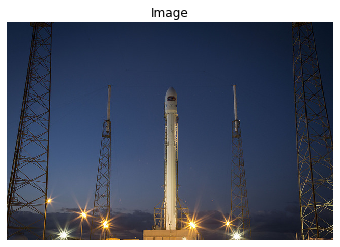

(427, 640, 3)


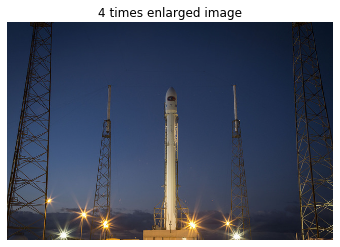

(1708, 2560, 3)


In [18]:
# Import the module and function to enlarge images
from skimage.transform import rescale

# Import the data module
from skimage import data

# Load the image from data
rocket_image = data.rocket()

# Enlarge the image so it is 4 times bigger
enlarged_rocket_image = rescale(rocket_image, 1*4, anti_aliasing=True, multichannel=True)

# Show original and resulting image
show_image(rocket_image)
print(rocket_image.shape)
show_image(enlarged_rocket_image, "4 times enlarged image")
print(enlarged_rocket_image.shape)

#### Resizing

It has a same purpose as rescale but it allows to specify an output image shape instead of scaling factor.

#### Resizing proportionally

Below we are resizing the image proportionally 4 times smaller.

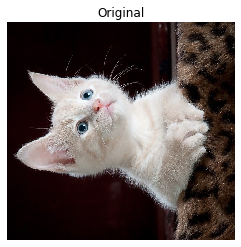

(612, 640, 3)


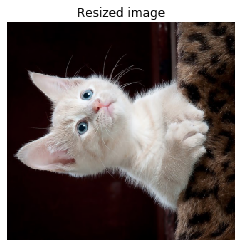

(306, 320, 3)


In [23]:
# Import the module and function
from skimage.transform import resize

image_cat = io.imread('image_cat.jpg')

# Set proportional height so its half its size
height = int(image_cat.shape[0] / 2)
width = int(image_cat.shape[1] / 2)

# Resize using the calculated proportional height and width
image_resized = resize(image_cat, (height, width),
                       anti_aliasing=True)

# Show the original and rotated image
show_image(image_cat, 'Original')
print(image_cat.shape)
show_image(image_resized, 'Resized image')
print(image_resized.shape)

### Morphology Filters
Morphological operators — dilate, erode, open, and close — can be applied through image filtering to grow or shrink image regions, as well as to remove or fill-in image region boundary pixels. 

#### Dilation 
Dilation add pixels to the boundries of objects in an images.

#### Erosion
Erosion removes pxels on object boundries.

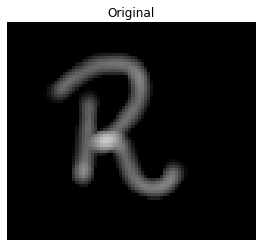

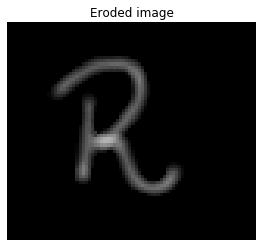

In [41]:
# Import the morphology module
from skimage import morphology

upper_r = io.imread('r5.png')

# Obtain the eroded shape 
eroded_image_shape = morphology.erosion(upper_r) 

# See results
show_image(upper_r_image, 'Original')
show_image(eroded_image_shape, 'Eroded image')
#plot_comparison(upper_r_image, eroded_image_shape, 'Eroded image')

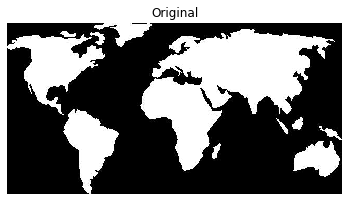

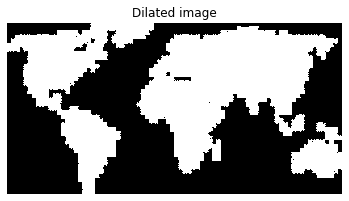

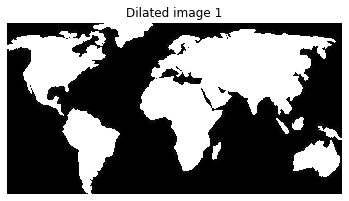

In [42]:
# Import the module
from skimage import morphology

world_image = io.imread('world_image_binary.jpg')

# Obtain the dilated image 
dilated_image = morphology.binary_dilation(world_image)
dilated_image1 = morphology.dilation(world_image)

# See results
show_image(world_image, 'Original')
show_image(dilated_image, 'Dilated image')
show_image(dilated_image1, 'Dilated image 1')